In [393]:
import os
import pandas as pd

In [394]:
#!unzip /content/pr_bia.zip

In [395]:
list_csv = []
for x in os.listdir('/content/'):
    if(x.endswith('.csv')):
        list_csv.append(x)

data_all = []
for x in list_csv:
    data_all.append(pd.read_csv('/content/' + x))

In [396]:
data = data_all[0]
for i in range(1, len(data_all)):
    data = pd.concat([data, data_all[i]], ignore_index=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [397]:
data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [398]:
#data = data.dropna(subset=['Purchase Address']).reset_index(drop=True)
data = data.dropna(how='all').reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186305 entries, 0 to 186304
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


In [399]:
address = data['Purchase Address'].unique()
print(address)
print(len(address))

['136 Church St, New York City, NY 10001'
 '562 2nd St, New York City, NY 10001'
 '277 Main St, New York City, NY 10001' ...
 '578 Main St, Los Angeles, CA 90001' '871 7th St, Los Angeles, CA 90001'
 '83 Washington St, San Francisco, CA 94016']
140788


In [400]:
dict_add = {}
for i in range(len(address)):
    dict_add[address[i]] = i+1

def get_id(address):
    if(type(address) == str):
        return dict_add[address]
    else:
        return 0

In [401]:
def get_month(date):
    if(type(date) == str):
        return date.split('/')[0]
    else:
        return ''

In [402]:
#data['Month'] = data['Order Date'].apply(get_month)
data['Id'] = data['Purchase Address'].apply(get_id)

In [403]:
data.loc[data['Product'] == 'Product']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Id
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,238
702,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,238
1098,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,238
2868,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,238
3696,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,238
...,...,...,...,...,...,...,...
184564,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,238
184854,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,238
185313,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,238
185495,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,238


In [404]:
data = data.loc[data['Product'] != 'Product']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186304
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Id                185950 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 11.3+ MB


In [405]:
def calculate_total_price(row):
    return int(row['Quantity Ordered']) * float(row['Price Each'])

# Áp dụng hàm calculate_total_price cho mỗi hàng trong DataFrame và tạo cột "Total Price"
data['Total Price'] = data.apply(calculate_total_price, axis=1)

In [406]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Id,Total Price
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",1,1700.00
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",2,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",3,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",4,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",5,11.95


In [407]:
address_counts = data['Id'].value_counts()
no_dup = data.loc[data['Id'].map(address_counts) == 1]

In [408]:
no_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105557 entries, 0 to 186302
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          105557 non-null  object 
 1   Product           105557 non-null  object 
 2   Quantity Ordered  105557 non-null  object 
 3   Price Each        105557 non-null  object 
 4   Order Date        105557 non-null  object 
 5   Purchase Address  105557 non-null  object 
 6   Id                105557 non-null  int64  
 7   Total Price       105557 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 7.2+ MB


In [409]:
dup = data.loc[data['Purchase Address'].duplicated(keep=False)]

In [410]:
dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80393 entries, 3 to 186304
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          80393 non-null  object 
 1   Product           80393 non-null  object 
 2   Quantity Ordered  80393 non-null  object 
 3   Price Each        80393 non-null  object 
 4   Order Date        80393 non-null  object 
 5   Purchase Address  80393 non-null  object 
 6   Id                80393 non-null  int64  
 7   Total Price       80393 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 5.5+ MB


In [411]:
dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Id,Total Price
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",4,149.99
9,295674,AAA Batteries (4-pack),4,2.99,12/28/19 11:51,"77 7th St, Dallas, TX 75001",10,11.96
10,295675,USB-C Charging Cable,2,11.95,12/13/19 13:52,"594 1st St, San Francisco, CA 94016",11,23.90
11,295676,ThinkPad Laptop,1,999.99,12/28/19 17:19,"410 Lincoln St, Los Angeles, CA 90001",12,999.99
12,295677,AA Batteries (4-pack),2,3.84,12/20/19 19:19,"866 Pine St, Boston, MA 02215",13,7.68


In [412]:
tmp_id = dup['Id'].unique()

In [413]:
print(tmp_id)
print(len(tmp_id))

[     4     10     11 ... 140743 140776 140788]
35230


In [414]:
name_col = 'Product'
tmp = data[name_col].unique()
print(tmp)
print(len(tmp))

['Macbook Pro Laptop' 'LG Washing Machine' 'USB-C Charging Cable'
 '27in FHD Monitor' 'AA Batteries (4-pack)' 'Bose SoundSport Headphones'
 'AAA Batteries (4-pack)' 'ThinkPad Laptop' 'Lightning Charging Cable'
 'Google Phone' 'Wired Headphones' 'Apple Airpods Headphones'
 'Vareebadd Phone' 'iPhone' '20in Monitor' '34in Ultrawide Monitor'
 'Flatscreen TV' '27in 4K Gaming Monitor' 'LG Dryer']
19


In [415]:
print('Giá trị trung bình đơn hàng của khách hàng cũ: ', dup['Total Price'].mean())
print('Giá trị trung bình đơn hàng của khách hàng mới:', no_dup['Total Price'].mean())

Giá trị trung bình đơn hàng của khách hàng cũ:  192.24475377209455
Giá trị trung bình đơn hàng của khách hàng mới: 180.34714400750306


In [416]:
name_col = 'Total Price'
tmp = data[name_col].unique()
print(tmp)
print(len(tmp))

[1.70000e+03 6.00000e+02 1.19500e+01 1.49990e+02 3.84000e+00 2.39000e+01
 9.99900e+01 1.19600e+01 9.99990e+02 7.68000e+00 5.98000e+00 1.49500e+01
 1.19900e+01 1.50000e+02 4.00000e+02 2.39800e+01 8.97000e+00 2.99000e+00
 7.00000e+02 1.09990e+02 3.79990e+02 3.00000e+02 1.15200e+01 3.89990e+02
 2.99000e+01 3.59700e+01 1.53600e+01 3.58500e+01 2.09300e+01 1.49500e+01
 1.99980e+02 1.79400e+01 4.48500e+01 7.59980e+02 1.92000e+01 4.79600e+01
 2.19980e+02 2.68800e+01 7.79980e+02 2.99980e+02 2.30400e+01 4.50000e+02
 5.98000e+01 1.20000e+03 4.78000e+01 3.40000e+03 2.69100e+01 2.99970e+02
 1.40000e+03 2.39200e+01 8.00000e+02 1.99998e+03 7.17000e+01 5.97500e+01]
54


In [417]:
tmp.sort()
print(tmp)

[2.99000e+00 3.84000e+00 5.98000e+00 7.68000e+00 8.97000e+00 1.15200e+01
 1.19500e+01 1.19600e+01 1.19900e+01 1.49500e+01 1.49500e+01 1.53600e+01
 1.79400e+01 1.92000e+01 2.09300e+01 2.30400e+01 2.39000e+01 2.39200e+01
 2.39800e+01 2.68800e+01 2.69100e+01 2.99000e+01 3.58500e+01 3.59700e+01
 4.48500e+01 4.78000e+01 4.79600e+01 5.97500e+01 5.98000e+01 7.17000e+01
 9.99900e+01 1.09990e+02 1.49990e+02 1.50000e+02 1.99980e+02 2.19980e+02
 2.99970e+02 2.99980e+02 3.00000e+02 3.79990e+02 3.89990e+02 4.00000e+02
 4.50000e+02 6.00000e+02 7.00000e+02 7.59980e+02 7.79980e+02 8.00000e+02
 9.99990e+02 1.20000e+03 1.40000e+03 1.70000e+03 1.99998e+03 3.40000e+03]


In [418]:
dup = dup.loc[dup['Total Price'] > 90]
no_dup = no_dup.loc[no_dup['Total Price'] > 90]

In [419]:
pro_no_dup = no_dup['Product'].value_counts()
pro_no_dup = pro_no_dup/pro_no_dup.sum()*100
print(pro_no_dup)

Apple Airpods Headphones      19.511719
Bose SoundSport Headphones    16.530431
27in FHD Monitor               9.635524
34in Ultrawide Monitor         8.044058
27in 4K Gaming Monitor         7.952993
iPhone                         6.578348
Flatscreen TV                  6.222762
Macbook Pro Laptop             6.083996
ThinkPad Laptop                5.377160
Google Phone                   5.281759
20in Monitor                   5.225385
Vareebadd Phone                1.951389
LG Washing Machine             0.804406
LG Dryer                       0.800069
Name: Product, dtype: float64


In [420]:
pro_dup = dup['Product'].value_counts()
pro_dup = pro_dup/pro_dup.sum()*100
print(pro_dup)

Apple Airpods Headphones      18.109931
Bose SoundSport Headphones    15.762553
iPhone                        10.528644
Google Phone                   8.540699
27in FHD Monitor               8.468812
27in 4K Gaming Monitor         7.083610
34in Ultrawide Monitor         6.832006
Flatscreen TV                  5.336209
Macbook Pro Laptop             5.303030
20in Monitor                   4.675404
ThinkPad Laptop                4.556514
Vareebadd Phone                3.221079
LG Washing Machine             0.815638
LG Dryer                       0.765870
Name: Product, dtype: float64


In [421]:
data['Price Each'] = data['Price Each'].astype(float)
product = data.groupby('Product')['Price Each'].mean()
product = product.sort_values(ascending=False)
print(product)

Product
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
iPhone                         700.00
LG Dryer                       600.00
LG Washing Machine             600.00
Google Phone                   600.00
Vareebadd Phone                400.00
27in 4K Gaming Monitor         389.99
34in Ultrawide Monitor         379.99
Flatscreen TV                  300.00
Apple Airpods Headphones       150.00
27in FHD Monitor               149.99
20in Monitor                   109.99
Bose SoundSport Headphones      99.99
Lightning Charging Cable        14.95
Wired Headphones                11.99
USB-C Charging Cable            11.95
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Name: Price Each, dtype: float64


In [422]:
print(product.index)

Index(['Macbook Pro Laptop', 'ThinkPad Laptop', 'iPhone', 'LG Dryer',
       'LG Washing Machine', 'Google Phone', 'Vareebadd Phone',
       '27in 4K Gaming Monitor', '34in Ultrawide Monitor', 'Flatscreen TV',
       'Apple Airpods Headphones', '27in FHD Monitor', '20in Monitor',
       'Bose SoundSport Headphones', 'Lightning Charging Cable',
       'Wired Headphones', 'USB-C Charging Cable', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)'],
      dtype='object', name='Product')


In [423]:
dict_pro = {'Macbook Pro Laptop':'Macbook', 'ThinkPad Laptop':'ThinkPad', 'iPhone':'iPhone', 'LG Dryer':'LG Dryer',
       'LG Washing Machine':'LG Washing', 'Google Phone':'G Phone', 'Vareebadd Phone':'V Phone',
       '27in 4K Gaming Monitor':'27in Game', '34in Ultrawide Monitor':'34in Monitor', 'Flatscreen TV':'Flatscreen' ,
       'Apple Airpods Headphones':'Apple HP', '27in FHD Monitor': '27in FHD', '20in Monitor':'20in Monitor',
       'Bose SoundSport Headphones':'Bose HP'}

In [424]:
new_cus = []
old_cus = []
x_ticks = []

for x in product.index:
    if(x in pro_dup.index and x in pro_no_dup.index):
        x_ticks.append(dict_pro[x])
        new_cus.append(pro_no_dup[x])
        old_cus.append(pro_dup[x])

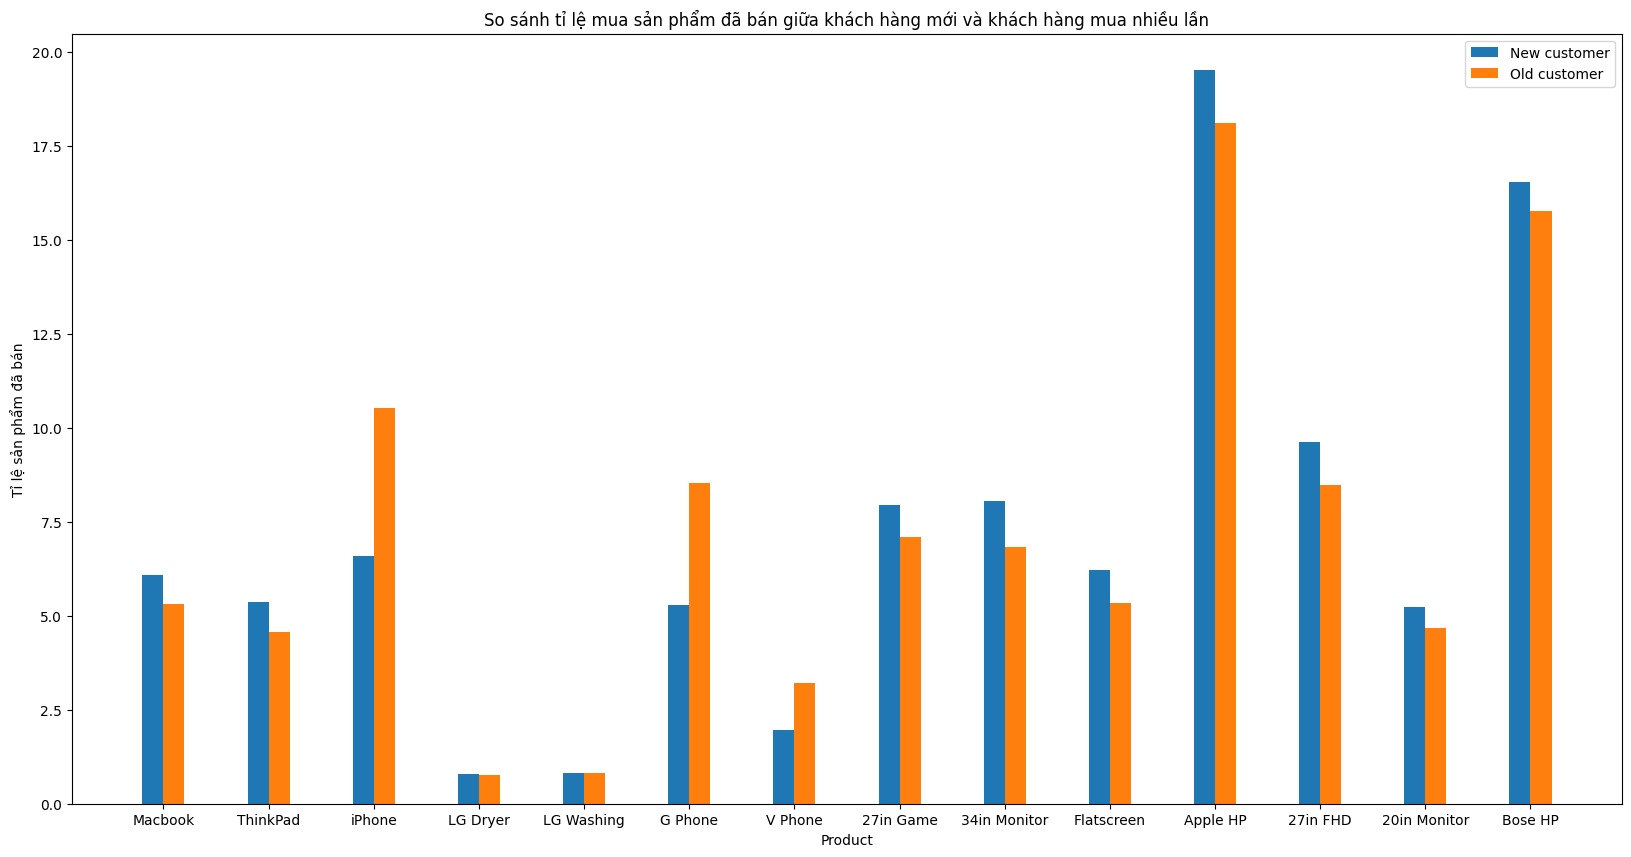

In [425]:
import matplotlib.pyplot as plt

# Tạo mảng chỉ số cho các cột
vi_tri_a = range(0,28,2)
vi_tri_b = [x+0.4 for x in vi_tri_a ]
vi_tri_c = [x+0.2 for x in vi_tri_a ]

# Vẽ biểu đồ cột
plt.figure(figsize=(20, 10))
plt.bar(vi_tri_a, new_cus, width=0.4, label='New customer')
plt.bar(vi_tri_b, old_cus, width=0.4, label='Old customer')

# Đặt nhãn cho trục x và trục y
plt.xlabel('Product')
plt.ylabel('Tỉ lệ sản phẩm đã bán')

# Đặt tiêu đề cho biểu đồ
plt.title('So sánh tỉ lệ mua sản phẩm đã bán giữa khách hàng mới và khách hàng mua nhiều lần')

# Đặt tên cho các cột trên trục x
plt.xticks(vi_tri_c, x_ticks)

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()
